# Week 3 - Probability Distributions 1 and 2

Learning contents:

1. Frequenist's approach
    - Bernoulli distribution function
    - Maximum Likelihood
    - Display distribution
2. Bayesian approach
    - Binomial distribution
    - Display Binomial distribution for different m
    - Maximum posterior
3. Multinomial variables
    - Generate data
    - Frequenist's approach
        - Multinomial Bernoulli distribution function
        - Maximum likelihood
4. Gaussian distribution
    - Distribution function
    - Generate data
    - Display data
    - Frequenist's approach
        - Maximum likelihood
        - Display distribution
    - Bayesian approach
        - Generate data
        - Variance is known, mean is unknown
        - Display mean estimation for different N

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

The code listed below defines 2 functions: 'weighted_coin' gives an output of a random experiment involving a single toss of a loaded or weighted coin. The probability of getting 'heads' is 0.7, whereas the probability of getting 'tails' is 0.3. In the case of heads, the function outputs 1, else it outputs 0.

In [2]:
random.seed(2605)

def weighted_coin(heads=0.7, tails=0.3):
    total = heads + tails
    value = random.random() * total
    result = 0 if value <= tails else 1
    return result


def generate_data(size):
    return list(map(
        lambda i: weighted_coin(),
        range(size)
    ))


train_size = 10000
train_data = generate_data(train_size)

<BarContainer object of 2 artists>

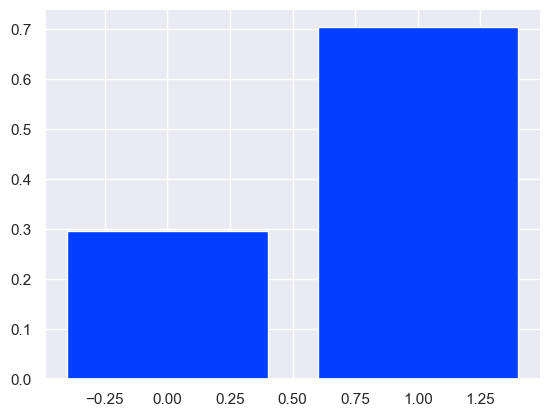

In [3]:
counter = Counter(train_data)
plt.bar(counter.keys(), list(map(lambda a: a / train_size, counter.values())))

## 1) Frequenist's approach

### 1.1) Bernoulli distribution function

write the function 'bern' that outputs the probability density function value of a bernoulli ramdom variable 'x' and paramater 'mu' (see slide 7 in lecture 5).

In [4]:
def bern(x, mu):
    print(x, mu)
    return mu**x * (1-mu)**(1-x)

### 1.2) Maximum Likelihood

write the function mu_maximum_likelihood_bern that takes data points train_data and should return the Maximum Likelihood estimate of the parameter 'mu' of the Bernoulli distribution (slide 9 of lecture 5). Is your estimate of 'mu' close to the theoretical value? Also, convince yourself that the 'train_data' that you generated above does belong to Bernoulli distribution!

In [5]:
def mu_maximum_likelihood_bern(train_data):
    # As the maximum likelihood takes into account the amount of data to the sum of every x possible, with x either being 0 & 1, we are only interested in the cases with x = 1 
    # With that in mind, we can rewrite the sum of every ones as a multiple times x=1: 
    # The result: m/N 
    N = len(train_data)
    ones = [1 for x in train_data if x == 1]
    m = len(ones)
    return m/N

mu_ml = mu_maximum_likelihood_bern(train_data)
# With the data created from the probability of ones being 0.7 and zeros being 0.3, mu should be 0.7
# With the dataset i get x = 1, 7045 times, x = 0, 10000 - 7045 times. 
# The total being 10000: 
# 7045/10000 = 0.7045, which is very close to the theoretical value. 

### 1.3) Display distribution

The function below plots the probability density (or mass) function of a Bernoulli random variable. Why is this function discrete?

In [6]:
def display_bernoulli(mu, color='b'):

    #xs = np.linspace(0., 1., 100)
    ys = list(map(
        lambda x: bern(x, mu),
        [0,1]
    ))

    plt.bar([0,1],ys)

0 0.7045
1 0.7045


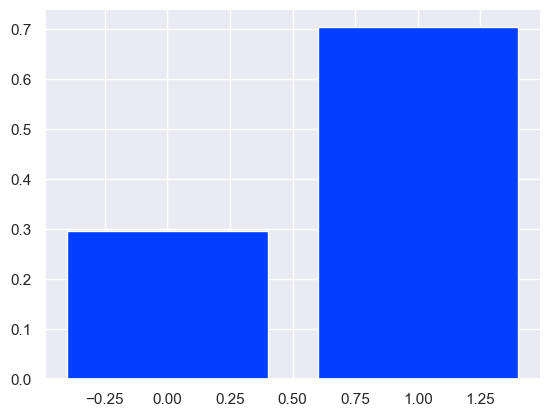

In [7]:
display_bernoulli(mu_ml)

## 2) Bayesian approach

### 2.1) Binomial distribution

write a function that gives the value of probability density function for Binomial random variable with input parameters 'm', 'N' and 'mu'

In [8]:
import math
def binomial(m, N, mu):
    
    def possibleCombinations(N, m): 
        return math.factorial(N)/(math.factorial(N - m) * math.factorial(m))
    return possibleCombinations(N, m) * (mu**m)* ((1 - mu)**(N - m))
    
binomial(5, 10, 0.4)

0.2006581248

### 2.2) Display Binomial distribution for different m

In [9]:
def display_binomial(N, mu):
    xs = list(range(N))
    ys = list(map(
        lambda m: binomial(m, N, mu),
        xs
    ))
    
    plt.bar(xs, ys)
    plt.xlabel('m')

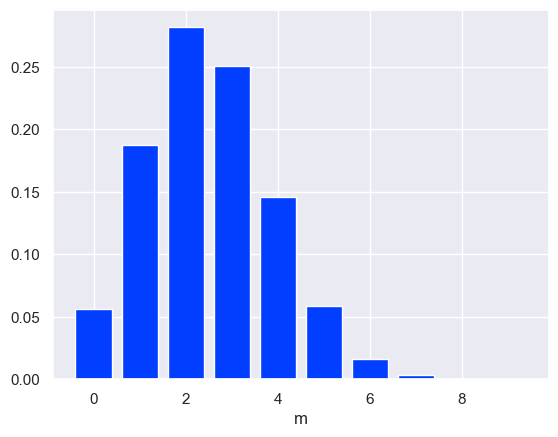

In [10]:
display_binomial(10, 0.25)

### 2.3) Maximum posterior

write a function 'mu_maximum_posterior_bern' which takes parameters 'm', 'N', 'a', 'b' and should return the Maximum Posterior estimate of the parameter 'mu' of the Bernoulli distribution (see the slide 18 in lecture 5). Compare this estimate with that obtained earlier in section 1.2 using maximum likelihood estimator. How the two estimators compare for large values of 'N'?

In [11]:
def mu_maximum_posterior_bern(m, N, a, b):
    l = N - m # The number of observations in the tail. 
    return (m + a) / (m + a + l + b)

In [12]:
print(mu_maximum_posterior_bern(sum(train_data), train_size, 0.1, 0.1)) # More digits
print(mu_maximum_likelihood_bern(train_data))
# The two are similiar, but the maximum posterior seems to have more digits. These might be significant. 

0.7044959100817983
0.7045


## 3) Multinomial variables

### 3.1) Generate data

generate samples of the multinomial random variable using 1-of-K scheme (see slide 21 of week 5)

In [13]:
np.random.seed(26)
def generate_multinomial_data(size, probabilities):
    numbers = np.random.choice(len(probabilities), size, 1, probabilities)
    
    result = np.zeros((numbers.size, len(probabilities)))
    result[np.arange(numbers.size), numbers] = 1
    return result
    
probabilities=[0.5, 0.1, 0.2, 0.1, 0.1]
multinomial_data = generate_multinomial_data(100, probabilities)
multinomial_data

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0.

### 3.2) Frequenist's approach

#### 3.2.1) Multinomial distribution function

write a function that gives the value of probability density function of multinomial random variable, given the data xs and parameters mus (see slide 21 of week 5)

In [14]:
def bern_multi(xs, mus):
    #Two approaches. The selfmade:
    p_last = 1
    p_total = 1
    for i in range(max(len(xs), len(mus))):
        x, mu = (xs[i], mus[i])
        bern = lambda x, mu: mu**x
        p_total = p_last * bern(x, mu)
        p_last = p_total
    
    # The numpy: 
    p = np.prod(mus**xs) 
    # print(p_total); print(p)   - These are equal. 
    return p

n = 6
x = np.random.randint(0, 2, size=n) # random integer of size 
mu = np.random.dirichlet(np.ones(n), size=1)[0] # Random values of size 6 summing to 1. 
p = bern_multi(x, mu)
print(f"\nx = {x},\nmu={mu},\np= {p}")



x = [0 0 0 1 1 1],
mu=[0.53605671 0.11779832 0.12639712 0.03256322 0.07592739 0.11125723],
p= 0.00027507686383766825


#### 3.2.2) Maximum likelihood

`mu_maximum_likelihood_multinomial_bern' takes multinomial data points multinomial_data and should return Maximum Likelihood estimate of the parameters 'mus' of the Multinomial distribution. Print the estimated parameter values and compare those with the actual values. If they are different, how could you bring them closer?

In [15]:
def mu_maximum_likelihood_multinomial_bern(multinomial_data):
    K = multinomial_data.shape[0] # Taken all the rows into account as k's. 
    mu = np.zeros(K)
    for k in range(0, K): 
        x = multinomial_data[k, :]
        N = len(x)
        m = len([x[i] for i in range(N) if x[i] == 1])
        mu[k] = m/N
    return mu

multi_mu_ml = mu_maximum_likelihood_multinomial_bern(multinomial_data)
multi_mu_ml

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

## 4) Gaussian distribution

### 4.1) Multivariate Gaussian Distribution Function

write a function that gives the value of probability density function of Gaussian random variable, given the data point 'x' and parameters 'mean' and 'variance' (see slide 6 of week 6). Hint: use the 'pdf' method of 'scipy.stats.multivariate_normal' function

In [16]:
def multi_gaussian(x, mean, covariance):
  pdf = multivariate_normal.pdf(x, mean, covariance)
  return pdf

### 4.2) Generate data

write a function to generate 'size' number of random samples from multivariate Gaussian distribution with specified mean and covariance.

In [17]:
def generate_multi_gaussian_data(size, mean, covariance):
    return np.array(multivariate_normal(mean=mean, cov=covariance).rvs(size=size, random_state=26))

target_mean = [1.7, -4]
target_cov = [[1, 0.1], [0.1, 1]]
multi_gaussian_data = generate_multi_gaussian_data(50, target_mean, target_cov)
print(multi_gaussian_data)
print(multi_gaussian_data.shape)

[[ 2.85686851 -5.44757342]
 [ 0.72646004 -4.085175  ]
 [ 1.6874327  -3.64797531]
 [ 2.90192167 -5.15880545]
 [ 1.87138635 -2.99327791]
 [ 2.46349168 -4.99983154]
 [ 1.52485507 -5.24321273]
 [ 3.07842791 -4.00611479]
 [ 0.29133137 -1.72462329]
 [-0.0697917  -2.96829688]
 [ 1.46539616 -3.86748028]
 [ 1.71930189 -2.58065738]
 [ 0.22761184 -4.69070555]
 [ 1.082424   -4.3310228 ]
 [ 0.93282453 -3.68009556]
 [ 1.70946273 -5.54212652]
 [ 2.43148498 -3.78148093]
 [ 2.13454676 -1.58105792]
 [ 0.73051775 -4.71044359]
 [ 2.39216529 -4.29713715]
 [ 1.2068044  -3.93847014]
 [ 2.15588413 -3.88405842]
 [ 1.75311695 -4.91820181]
 [ 2.57668493 -4.95450638]
 [ 2.22789228 -4.59693952]
 [ 2.1551937  -4.02145236]
 [ 2.046024   -4.76037852]
 [ 1.25047913 -3.60494171]
 [ 3.03727837 -5.49679472]
 [ 1.58942717 -4.1871539 ]
 [ 3.16256462 -4.05540441]
 [ 0.35156613 -2.34076489]
 [ 3.25933051 -3.25155967]
 [ 1.04079757 -3.1649992 ]
 [ 0.78103339 -2.45519461]
 [ 2.08488933 -4.1216915 ]
 [ 1.74136689 -3.93681744]
 

### 4.3) Display data

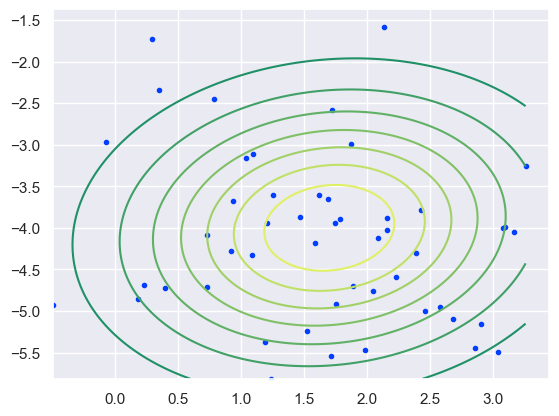

In [18]:
plt.plot(multi_gaussian_data[:, 0], multi_gaussian_data[:, 1], '.')

def display_gaussian_contour(data, mean, covariance, cmap='summer'):

    lx = min(data[:, 0])
    rx = max(data[:, 0])
    by = min(data[:, 1])
    uy = max(data[:, 1])

    x, y = np.mgrid[lx:rx:.01, by:uy:.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal(mean, covariance).pdf(pos), cmap=cmap)


display_gaussian_contour(multi_gaussian_data, target_mean, target_cov)

### 4.4) Parameter Estimation using Frequenist's approach

#### 4.4.1) Maximum likelihood

write the `multi_gaussian_mu_maximum_likelihood` function that takes Gaussian distributed data points `multi_gaussian_data` and should return Maximum Likelihood estimate of the mean of Multivariate Gaussian distribution.

In [19]:
def multi_gaussian_mu_maximum_likelihood(multi_gaussian_data):
    N = multi_gaussian_data.shape[0]
    D = len(multi_gaussian_data.shape)
    # Dimension check
    if D > 1: 
        # Iterate over each variable x
        mu = np.zeros(multi_gaussian_data.shape[1])
        i = 0
        for xn in multi_gaussian_data.T:  # Instead of (x , y) i know iterate over every x values, then the y's. 
            mu[i] = np.mean(xn)
            i+=1
        return mu
    else: 
        # Calculate for the only variable x 
        mu = np.mean(multi_gaussian_data.T)
        return mu 

g_mu_ml = multi_gaussian_mu_maximum_likelihood(multi_gaussian_data)
g_mu_ml

array([ 1.64301733, -4.13747801])

Write the function `multi_gaussian_covariance_maximum_likelihood` that takes Gaussian data points `multi_gaussian_data` and Maximum Likelihood estimate for `mu` (`g_mu_ml`) and should return Maximum Likelihood estimate of the covariance matrix of that distribution (slide 12 of lecture 6).

In [20]:
def multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml):
    N = multi_gaussian_data.shape[0]
    const = 1/(N - 1)
    covarianceMatrix = np.zeros((2, 2))
    x = multi_gaussian_data
    for n in range(N): 
        xn = x[n]
        paren = xn-g_mu_ml
        covarianceMatrix += const*(np.outer(paren, paren)) # const * paren.dot(paren.T)
    
    return covarianceMatrix
print(min(multi_gaussian_data[:, 0]), max(multi_gaussian_data[:, 0]))
print(min(multi_gaussian_data[:, 1]), max(multi_gaussian_data[:, 1]))
g_cov_ml = multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml)
g_cov_ml


-0.4915417548998311 3.259330506046435
-5.816459423087618 -1.5810579174826076


array([[ 0.84757357, -0.18427121],
       [-0.18427121,  0.97482937]])

#### 4.4.2) Display distribution

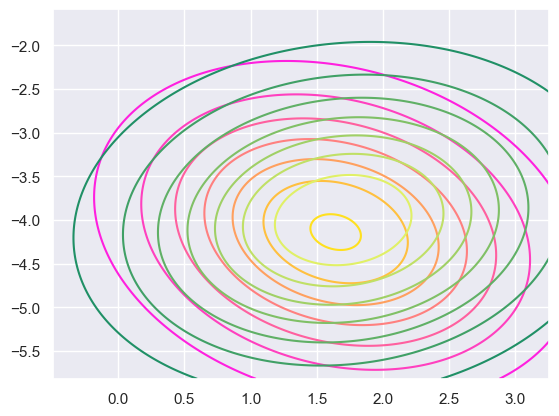

In [21]:
display_gaussian_contour(multi_gaussian_data, g_mu_ml, g_cov_ml, cmap='spring')
display_gaussian_contour(multi_gaussian_data, target_mean, target_cov, cmap='summer')

### 4.5) Parameter Estimation using Bayesian approach

#### 4.5.1) Generate data

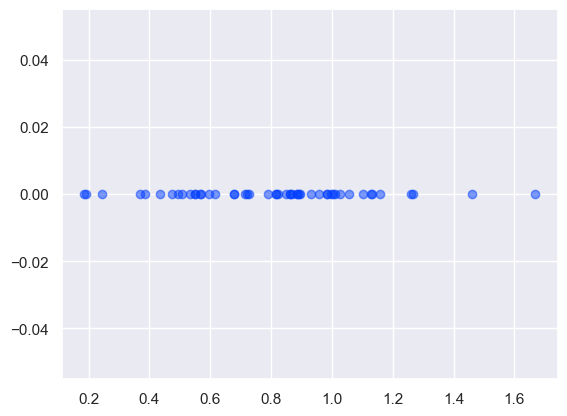

In [22]:
def generate_gaussian_data(size, mean, variance):
    return np.array(norm(mean, sqrt(variance)).rvs(size=size, random_state=26))

g_mean = 0.8
g_variance = 0.1
gaussian_data = generate_gaussian_data(50, g_mean, g_variance)

plt.scatter(gaussian_data, [0] * len(gaussian_data), alpha=0.5)

#### 4.5.2) Estimating mean distribution when the variance is known

write the function `multi_gaussian_mu_maximum_posterior` that takes data points `gaussian_data`, prior `mu0` and `variance0`, `variance` and should return Maximum Posterior estimate of the mean of Multivariate Gaussian distribution and its variance (see bottom 2 equations in slide 15 of lecture 6)

In [23]:
def multi_gaussian_mu_maximum_posterior(gaussian_data, mu0, variance0, variance):
    N = gaussian_data.shape[0]
    mu_ml = multi_gaussian_mu_maximum_likelihood(gaussian_data)
    muN = (variance/(N*variance0 + variance))*mu0 + (N*variance0/(N*variance0 + variance))*mu_ml
    
    #    1              1         N
    # --------- = --------- + -----------
    # varianceN   variance0    variance
    
    # So 
    #                          variance
    # varianceN = variance0 + -----------
    #                              N
    
    varianceN = variance0 + variance/N 
    
    return (muN, varianceN)
    
    pass

g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
g_mu_map, g_mu_var_map

(np.float64(0.7873049121325899), 0.10200000000000001)

#### 4.5.3) Display mean estimation for different values of N

Looking at the plots below, why does the mean distribution gets more and more concentrated around true value as the number of samples increase? What benefits this Bayesian approach offers over maximum likelihood approach?

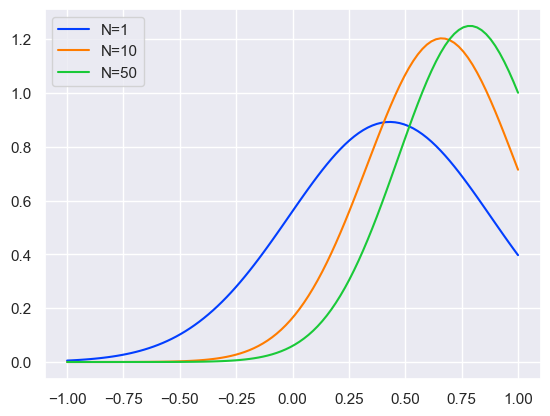

In [24]:
def display_mu_map(gaussian_data, mu0, variance0, variance):
    g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance) # a = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance) # 
    x = np.linspace(-1, 1, 100)
    y = norm(g_mu_map, sqrt(g_mu_var_map)).pdf(x)
    plt.plot(x, y, label='N=' + str(len(gaussian_data)))
    plt.legend()

# Does this even make sense?
# Data points of 0? It's only one dimension so this is a dataset of zero.
# I could adapt my function to ignore this case, but I see no use for doing this. 
# I'd rather just ignore the first plot. 
# display_mu_map(gaussian_data[:0], 0, g_variance, g_variance) 
display_mu_map(gaussian_data[:1], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:10], 0, g_variance, g_variance)
display_mu_map(gaussian_data, 0, g_variance, g_variance)